# 64x64 DCGAN experiment

## Importy + mount drive


In [1]:
# imports
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    output_path = "/content/drive/My Drive/gan_files"
    %rm -r /content/BP-Bielko-GAN-Docker
    %rm -r /content/src
    !git clone https://github.com/2021-FIIT-Bc-projects/BP-Bielko-GAN-Docker.git
    %cd BP-Bielko-GAN-Docker/gan
else:
    output_path = "."


from src.dcgan_models import *

In [2]:
list_physical_devices('GPU')

NameError: name 'list_physical_devices' is not defined

In [3]:
# model definitions

model_name = "gan_128_final_strong"

p_dims = 100
p_n = 100
predetermined_inputs = np.random.randn(p_dims * p_n)  # n vectors from the normal distribution
predetermined_inputs = predetermined_inputs.reshape(p_n, p_dims)

height = 128
width = 128

generator = Generator(height, width, n_dim=100, n_paralell_samples=128, init_size=4)


## Definície modelov, funkcií - TODO real sample dict + predeterined samples prerob, sprav funkciu co nastavi rozmery

<AxesSubplot:>

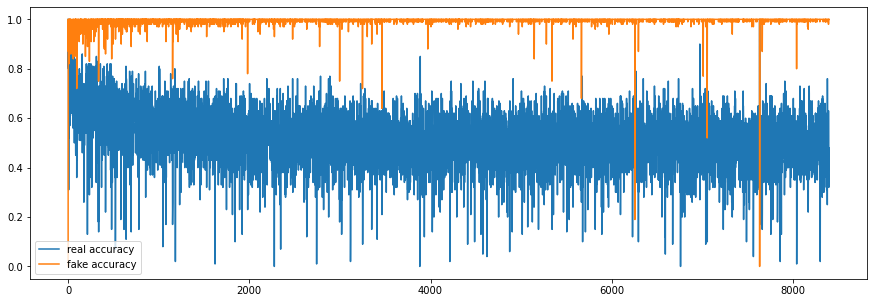

In [10]:
import pandas as pd

model_name = "fastgan"
data_path = path.join(model_name, "outputs", "evaluation", "metrics.csv")

cols = ["batch_id", "timestamp", "real loss", "fake loss", "gan loss", "real accuracy", "fake accuracy"]
df = pd.read_csv(data_path, names=cols, header=None)
# df = df.set_index(cols[0])

df[:].plot(y=["real accuracy", "fake accuracy"], figsize=(15,5))

In [4]:
from_epoch = 0
to_epoch = 270
interval = 10

for epoch in range(from_epoch, to_epoch, interval):
    generate_and_plot(generator, 100, predetermined_inputs, 1)

2022-05-13 13:38:28.143754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-13 13:38:28.278498: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2022-05-13 13:38:28.278536: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at matmul_op_impl.h:442 : Internal: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node sequential_3/dense_2/MatMul (defined at home/ladislav/Documents/DCGAN-Docker/gan/src/dcgan_models.py:400) ]] [Op:__inference_predict_function_1091]

Function call stack:
predict_function


<AxesSubplot:xlabel='batch_id'>

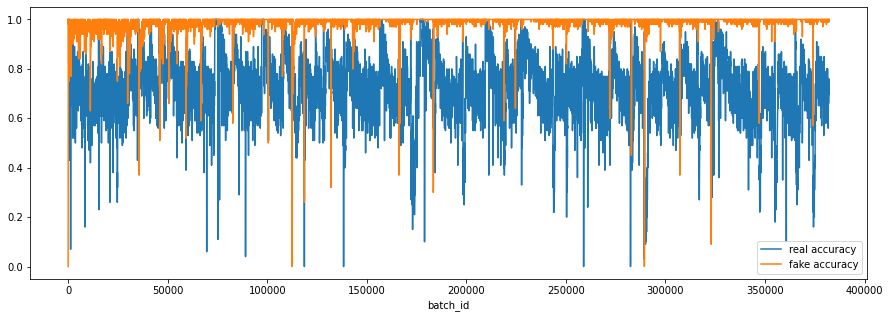

In [12]:
import pandas as pd

model_name = "gan_128_final_strong"
data_path = path.join(model_name, "outputs", "evaluation", "metrics.csv")

cols = ["batch_id", "timestamp", "real loss", "fake loss", "gan loss", "real accuracy", "fake accuracy"]
df = pd.read_csv(data_path, names=cols, header=None)
df = df.set_index(cols[0])

df[:].plot(y=["real accuracy", "fake accuracy"], figsize=(15,5))